In [2]:
import pandas as pd

In [4]:
df = pd.read_csv("C:\\Users\\Onkar Raising\\Downloads\\customer_orders.csv")

In [5]:
df.head()

,Order_ID,Customer_ID,Order_Date,City,Product_Category,Quantity,Price_per_Unit,Payment_Method,Total_Amount
0,ORD10000,CUST1003,2024-01-01,Mumbai,Home,3,963,Credit Card,2889
1,ORD10001,CUST1000,2024-01-02,Pune,Clothing,4,2890,Credit Card,11560
2,ORD10002,CUST1008,2024-01-03,Pune,Sports,1,663,Cash on Delivery,663
3,ORD10003,CUST1007,2024-01-04,Mumbai,Home,3,4291,UPI,12873
4,ORD10004,CUST1007,2024-01-05,Delhi,Clothing,3,1857,UPI,5571


Data Cleaning

In [6]:
# Check nulls
df.isnull().sum()

Order_ID            0
Customer_ID         0
Order_Date          0
City                0
Product_Category    0
Quantity            0
Price_per_Unit      0
Payment_Method      0
Total_Amount        0
dtype: int64

In [7]:
# Check duplicates
df.duplicated().sum()

0

In [8]:
# Convert Order_Date to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [9]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          200 non-null    object        
 1   Customer_ID       200 non-null    object        
 2   Order_Date        200 non-null    datetime64[ns]
 3   City              200 non-null    object        
 4   Product_Category  200 non-null    object        
 5   Quantity          200 non-null    int64         
 6   Price_per_Unit    200 non-null    int64         
 7   Payment_Method    200 non-null    object        
 8   Total_Amount      200 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 14.2+ KB


 Exploratory Data Analysis (EDA)

In [10]:
# Top 5 most purchased categories
df['Product_Category'].value_counts().head(5)

Product_Category
Sports      41
Clothing    36
Home        35
Books       32
Beauty      29
Name: count, dtype: int64

In [11]:
#Total revenue by city
df.groupby('City')['Total_Amount'].sum().sort_values(ascending=False)

City
Hyderabad    282113
Mumbai       262516
Delhi        236198
Pune         231621
Chennai      207748
Bangalore    152563
Name: Total_Amount, dtype: int64

In [12]:
#Average purchase value per customer
df.groupby('Customer_ID')['Total_Amount'].mean().sort_values(ascending=False)

Customer_ID
CUST1001    11181.857143
CUST1000    10532.200000
CUST1009     9749.833333
CUST1005     9736.777778
CUST1016     9042.222222
CUST1018     8137.555556
CUST1014     7179.555556
CUST1002     7052.071429
CUST1019     6982.666667
CUST1015     6842.400000
CUST1003     6796.750000
CUST1006     6640.700000
CUST1007     6002.294118
CUST1013     5631.428571
CUST1011     5588.300000
CUST1017     5557.812500
CUST1012     5190.600000
CUST1004     5082.000000
CUST1010     4670.500000
CUST1008     4198.000000
Name: Total_Amount, dtype: float64

In [13]:
#Most popular payment method
df['Payment_Method'].value_counts()

Payment_Method
Cash on Delivery    63
Net Banking         50
UPI                 46
Credit Card         41
Name: count, dtype: int64

<Axes: title={'center': 'Monthly Revenue'}, xlabel='Month'>

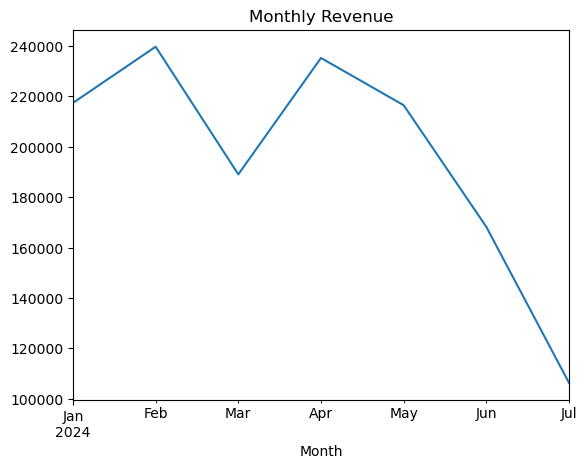

In [14]:
#Monthly sales trend
df['Month'] = df['Order_Date'].dt.to_period('M')
df.groupby('Month')['Total_Amount'].sum().plot(kind='line', title="Monthly Revenue")

Visualizations (Matplotlib / Seaborn)

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

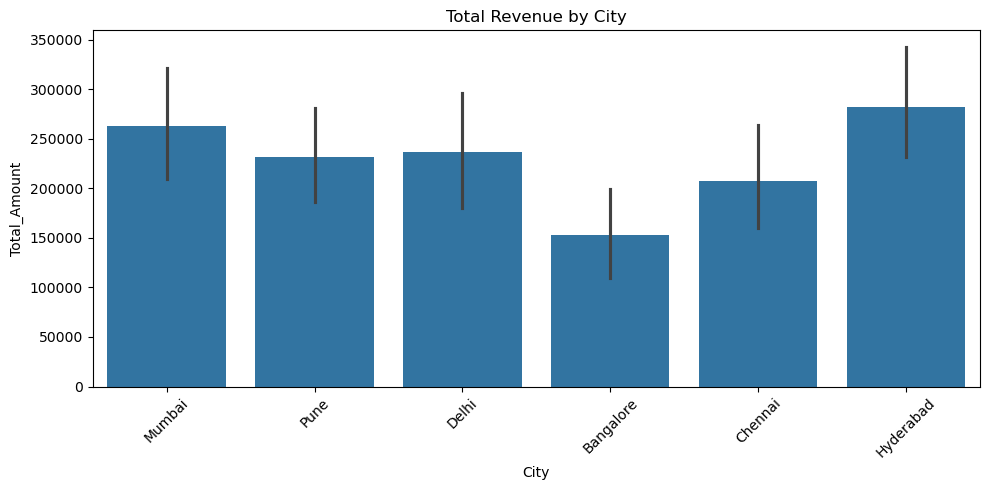

In [16]:
# Revenue by city
plt.figure(figsize=(10,5))
sns.barplot(x='City', y='Total_Amount', data=df, estimator=sum)
plt.title("Total Revenue by City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

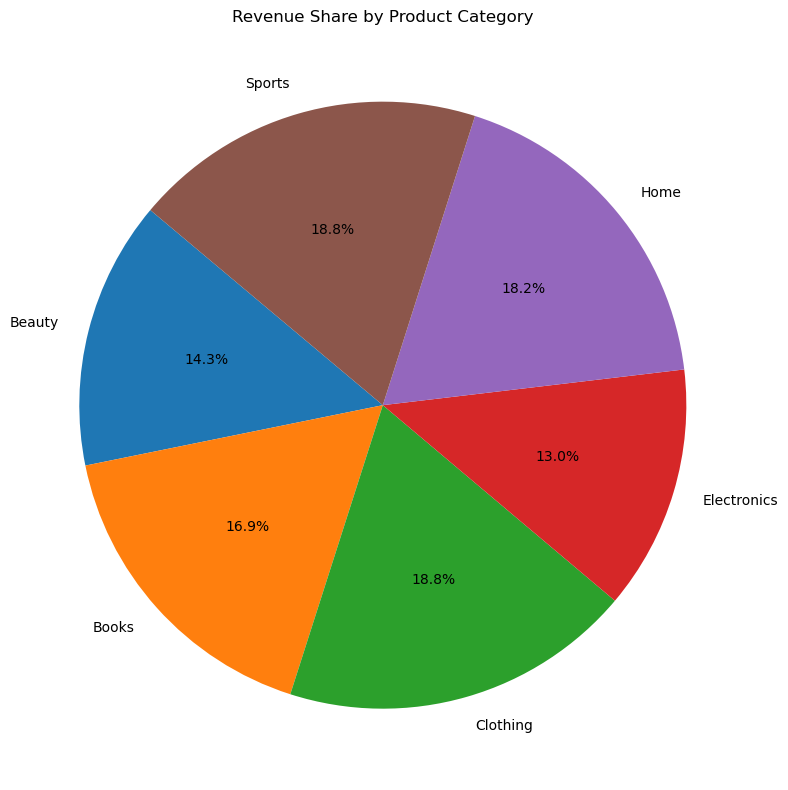

In [25]:
#Total Revenue by Product Category
category_sales = df.groupby('Product_Category')['Total_Amount'].sum()
plt.figure(figsize=(8,8))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140)
plt.title("Revenue Share by Product Category")
plt.axis('equal')  # Makes the pie circular
plt.tight_layout()
plt.show()

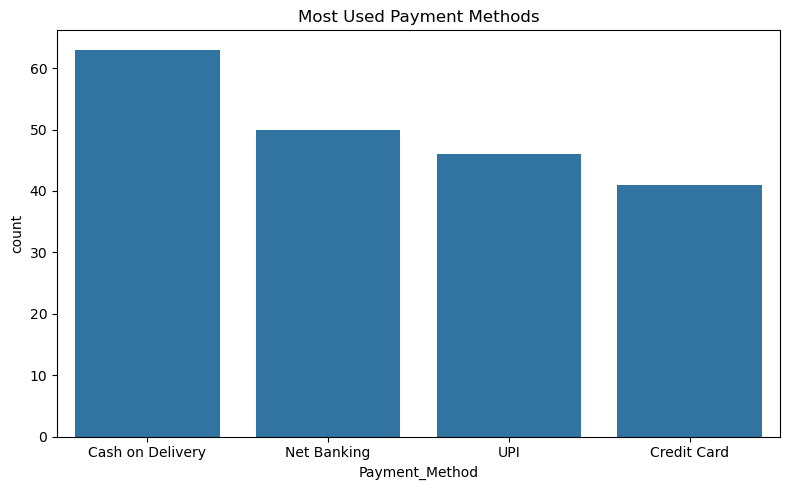

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(x='Payment_Method', data=df, order=df['Payment_Method'].value_counts().index)
plt.title("Most Used Payment Methods")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [19]:
#Monthly Revenue Trend
df['Month'] = df['Order_Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total_Amount'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

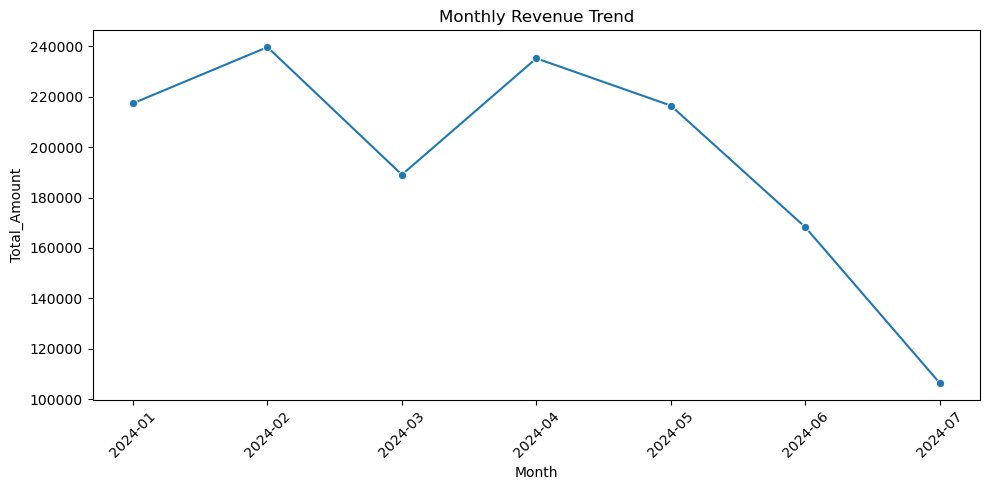

In [20]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Month', y='Total_Amount', data=monthly_sales, marker='o')
plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()